In [13]:
import numpy as np
import matplotlib.pyplot as plt
import astropy

# LightCurve U18

In [9]:
cp ../u9712005/*18.npy .

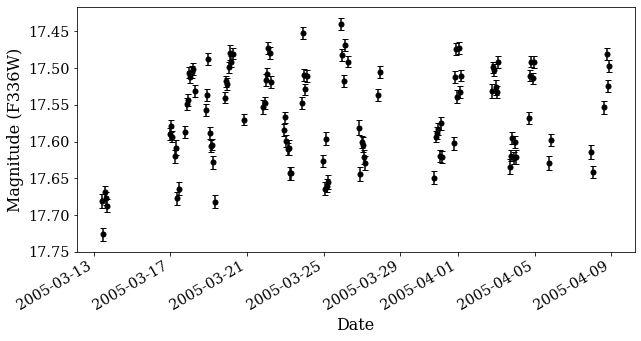

In [75]:
############
name = 'u18'
mjd = np.load('mjd'+name+'.npy')
mag = np.load('mag'+name+'.npy')
dmag = np.load('dmag'+name+'.npy')
obnames = np.load('obnames'+name+'.npy')
time = np.load('time'+name+'.npy')

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.invert_yaxis()
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Magnitude (F336W)',fontsize=16)
ax.errorbar(time, mag, yerr=dmag,fmt='.',color='k',capsize=3)


plt.plot_date(time, mag,color='k',ms=5)

plt.gcf().autofmt_xdate()
plt.show()

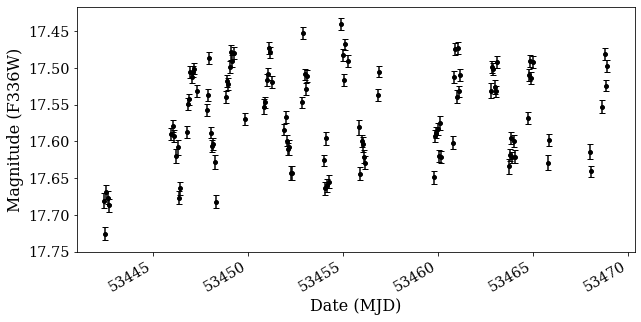

In [84]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.invert_yaxis()
ax.set_xlabel('Date (MJD)',fontsize=16)
ax.set_ylabel('Magnitude (F336W)',fontsize=16)
ax.errorbar(mjd, mag, yerr=dmag,fmt='.',color='k',capsize=3)


plt.scatter(mjd, mag,color='k',s=15)

plt.gcf().autofmt_xdate()
plt.show()

# Folded LightCurve